## Radian

- pi(무리수) : 3.1415
- radian : 각의 크기를 재는 SI 단위다. 
- 1 radian은 57.2957..., 0.0175 radian(1/180 파이 radian)이 1도다.

#### 더 공부하려면 Euler(오일러) 공식 찾아보기

- 오일러공식 e의 theta*i제곱 = cos(theta) + sin(theta)i
- theta = 0, pi/2, pi, 3pi/2일 때, 1, i, -1, -i

#### 복소수를 plot하는 방법을 배울 것임
- 실수부, 허수부를 각각 축으로 설정하여 오일러 공식의 위 값들을 대입하였을 때
- (1,0),(0,1),(-1,0),(0,-1)에 점이 찍히고
- 하나의 원이 생성된다
- 원 안에서 theta 값이 구현된다. (theta, radian의 정의를 알 수 있음)

# 오일러공식 = 식 암기 필요
- cosine, sine component 모두를 다루는 Phasor에 대하여 알 필요가 있음

In [1]:
# Plotting을 위해 필요한 library = matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Audio를 play하기 위해서 ipd라는 것을 불러옴.
import IPython.display as ipd
# numpy library
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor
- sinusoidal(pure tone : Sine wave, Cosine wave)을 만들어주는 것이 Phasor
- Cosine과 Sine의 성질을 동시에 갖고 있음. (실수부가 cosine, 허수부가 sine 함수임)

In [3]:
# 1. parameter setting 
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz    : 음질에 영향을 끼침 (sampling rate = 음질의 해상도)
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz   : 1초에 몇개의 sine wave가 있는가?

### generate time, phase가 가장 중요함
- generate time 시에, +1 해주는게 중요함. (1/10000초부터, 1/2초까지 만들어짐)
- time을 생성해야 실제에 존재하는 소리로 구현된다. (모든 사물은 sine wave로 표현할 수 있음)
    - 각도값을 넣지 않으면 실체가 생성되지 않는다.
- 우리가 아는 pi는 np.pi로, sine은 np.sin으로 정의해준다.
- frequency를 안 써주면 한 바퀴, 여기서는 100바퀴로 정의해줌. 

In [5]:
# 2.generate time
t = np.arange(1, sr * dur+1)/sr

In [6]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [7]:
# 3.generate phase
theta = t * 2*np.pi * freq

In [8]:
# 4.generate signal by cosine-phasor (amplitude를 곱해줘야 소리의 강도를 설정할 수 있다.)
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

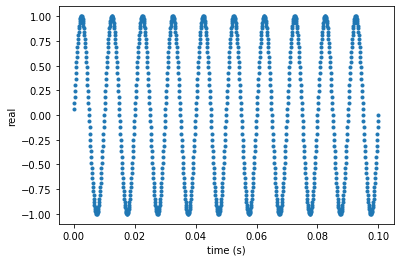

In [8]:
# 5.plotting
fig = plt.figure()
# plotting의 Size를 보여준느 함수다. # 111이라는 뜻은 1by1고, 그 중에 첫번째로 선택을 한다는 뜻이다. 
ax = fig.add_subplot(111)
# time과, s
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

# 시험문제 : 점들의 갯수는 몇개인가? => 1000개.
# 점의 갯수가 맞지 않으면 실행이 되지 않는다.

Text(0, 0.5, 'real')

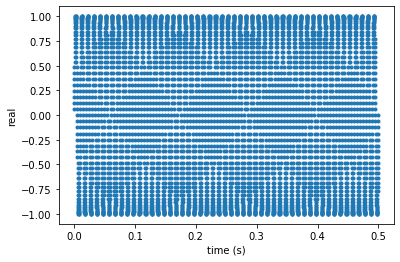

In [9]:
# 5.plotting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[:], s[:], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

# 보이지 않기 때문에 1000개의 점만 사용한 거였음.

### 참고 : 각도값으로만 Plot해보기

- 모든 현상을 sine 함수로 표현할 수 있다는 예가 된다.

In [10]:
# 1. parameter setting 
amp = 1         
sr = 10000       
dur = 0.5        
freq = 100

#### np.arange (start, stop, step, dtype)

In [11]:
# 여기서 theta는 radian 값을 넣어준 것이며, 7개의 radian 값이 도출된 것임
# np.arange 함수를 알 필요가 있음
theta = np.arange(0, 2*np.pi, 0.1)
s = np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

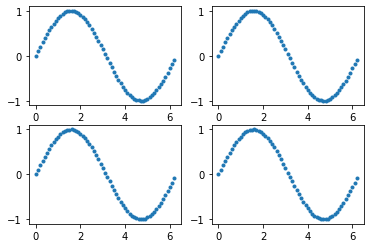

In [12]:
# 2. Plotting
fig = plt.figure()
# 221이라는 뜻은 2 by 2고, 그 중에 첫번째로 선택을 한다는 뜻이다
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

Text(0, 0.5, 'value')

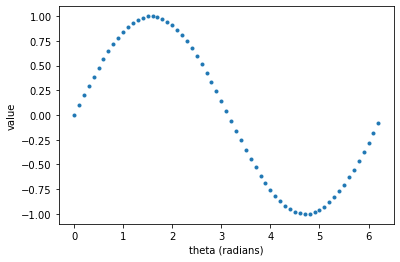

In [13]:
# 2. Plotting
fig = plt.figure()
# 221이라는 뜻은 2 by 2고, 그 중에 첫번째로 선택을 한다는 뜻이다
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
# default는 ax.plot(theta, s, '-') => line임.
ax.set_xlabel('theta (radians)')
ax.set_ylabel('value')

- x축에서는 equidistant한데, y축에서는 equidistant하지 않음.
- linear한(직선) 경우네는 x,y축 모두 equidistant한다.

In [14]:
# 이렇게 만들경우 5번 돌게 되어있음. (10pi여서)
theta = np.arange(0, 5*2*np.pi, 0.1)
s = np.sin(theta)

Text(0, 0.5, 'value')

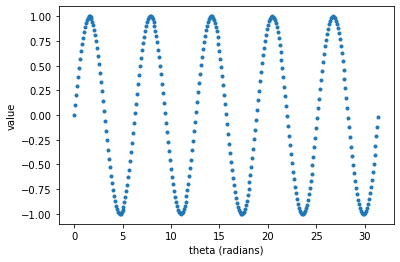

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta (radians)')
ax.set_ylabel('value')

### 시간이 없으면 실체가 존재하지 않음.
- sine wave가 몇초, 몇년에 걸려서 도는지 알 수 없다.
- 따라서, generate time을 해준다.

### 실제 소리를 만들 때는
- x축에 theta 값을 쓰지 않음. (뻔함)
- 따라서, time을 쓴다.

# 3차원 (t, r, i)

In [40]:
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [43]:
# generate time
t = np.arange(1, sr * dur+1)/sr
# generate phase
theta = t * 2*np.pi * freq
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)

3차원은 원래 plotting이 안되지만, 2개의 축(복소평면)을 이용하고, 시간을 부여해 3차원으로 plotting을 할 수 있다.

Text(0.5, 0, 'imag')

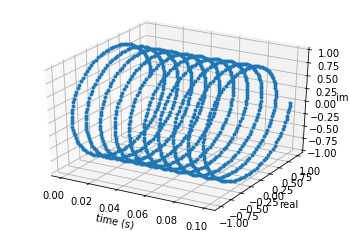

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 3차원이기 때문에 입력이 두개가 있음
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

#### 따라서, 오일러 공식에 부합하는 플로팅이다.
- 이를 exponential phasor라고 부른다.
- x축 time, y축 imag 일때, sine함수임.
- x축 time, y축 real 일때, cosine함수임.
- 복소수의 정의는 a + bi

In [19]:
ipd.Audio(c.real, rate=sr)

In [26]:
!pip install sounddevice
import sounddevice as sd
sd.play(c.real, sr)

     |████████████████████████████████| 81kB 481kB/s eta 0:00:011


# Generate Pulse Train
- 성대의 원리 (인공 성대 형성 방법)

# 중요한 개념!
- sampling rate이 100hz일 때 freq가 1 - 가능. 2도 가능 (sine wave를 1,2개 만들 수 있음)
- sampling rate이 100hz일 때 freq가 10000hz 가능? - 안된다!!
    - sr이 적당히 있어야 freq(주파수)를 표현할 수 있음.

# 11월 12일 NAMZ 유튜브 봅시당 

# 여기서부터 11월 14일 강의

In [33]:
# parameter
amp = 1
sr = 10000
dur = 0.5
freq = 440.0

# 440이 라(A)니까, 220이나 110 모두 라(A)다. 

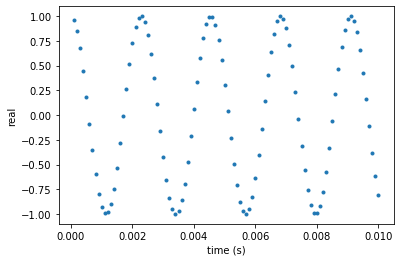

In [37]:
# generate time
t = np.arange(1, sr * dur+1)/sr
# generate phase
theta = t * 2*np.pi * freq
# generate signal by cosine-phasor : cosine으로 했을 때와 sine으로 했을 때 소리가 똑같다. 
# (함수가 조금 이동한 것밖에 안됨. 90도, 1/2파이) - Phase에 우리의 귀는 sensitive하지 않음.(즉, 각도 혹은 함수의 이동에는 민감X)
# 대신 freq, amp에 우리의 귀는 민감하다.
s = amp * np.cos(theta)

# 5.plotting
fig = plt.figure()
ax = fig.add_subplot(111)
# time과, s
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

ipd.Audio(s, rate=sr)

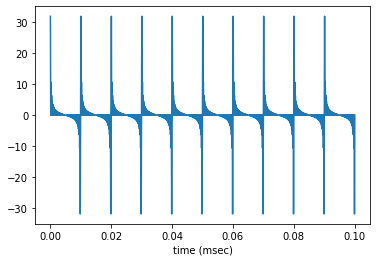

In [9]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

# 산맥이 형성되지 않음....

In [15]:
# 내용은 알면 좋다. 
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [16]:
RG = 0  # RG is the frequency of the Glottal Resonator 
BWG = 100  # BWG is the bandwidth of the Glottal Resonator (100정도면 뚱뚱한 편임)
# Frequency 0에 해당하는 곳에 100짜리의 산맥을 만들어라. (Gradually decrease 되게....)

# sr를 넣고, RG는 산맥의 위치 (Frequency 값을 주면 됨), BWG는 산이 얼마나 뚱뚱하냐? 뾰족하냐?
# 소리가 약간 부드러워지고, 듣기 좋게 되었음. (Gradually decrease 되기 때문에...)
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [17]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b = resonance(sr,RG,BWG)

# s는 위에꺼 계속 쓴다. 
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [18]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [39]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [40]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

## 입술이 없으면 힘이 없음
- 입술 때문에 소리가 공명되어 더 크게 나감.
- 위의 코드가 입술이 없는 것
- 밑의 코드가 입술이 있는 것 (더 크게 sound가 남) : 우리의 /어/ 소리와 동일함. 

In [41]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [42]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [43]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

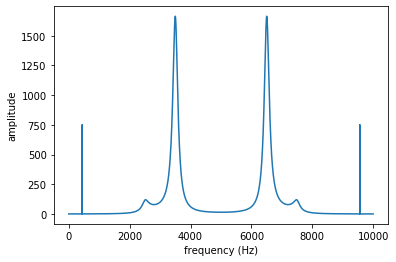

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')